In [13]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [14]:
data = load_iris()

In [15]:
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [19]:
model = KNeighborsClassifier(n_neighbors = 5)

In [20]:
model.fit(X_train, y_train)

c:\Users\faiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [21]:
y_pred = model.predict(X_test)

In [23]:
acc = accuracy_score(y_pred, y_test)
acc

1.0

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [27]:
model.fit(X_train_scaled, y_train)

c:\Users\faiza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [29]:
y_pred_scaled = model.predict(X_test_scaled)

In [31]:
acc = accuracy_score(y_pred_scaled, y_test)
acc

0.9666666666666667

In [33]:
con = confusion_matrix(y_test, y_pred)
con

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [40]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
dt = pd.DataFrame(con, index = data.target_names, columns = data.target_names)
dt

,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,9,0
virginica,0,0,11


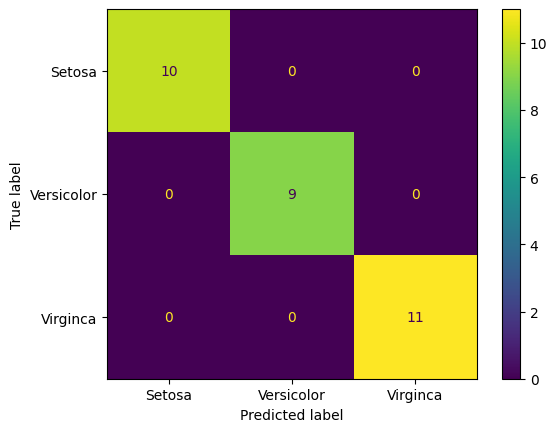

In [46]:
labels = ["Setosa", "Versicolor", "Virginca"]
disp = ConfusionMatrixDisplay(confusion_matrix = con, display_labels = labels)
disp.plot();